[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/juansensio/blog/blob/master/111_df_sd/111_df_sd.ipynb)

# Stable Diffusion

En este post veremos varias cosas que podemos hacer con stable diffusion usando Hugging Face.

## Generación de imágenes a partir de texto

```
pip install diffusers==0.4.0 transformers scipy ftfy
```

In [5]:
import os 
from dotenv import load_dotenv

load_dotenv()

token = os.environ['HFTOKEN']
# token

In [7]:
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", use_auth_token=token)
pipe.to('cuda')

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/522 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/335M [00:00<?, ?B/s]

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.4.0",
  "feature_extractor": [
    "transformers",
    "CLIPFeatureExtractor"
  ],
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [10]:
# prompt = "a photograph of an astronaut riding a horse"
prompt = "a white and brown american stafford playing with a ball in the river"

image = pipe(prompt)["sample"][0]

  0%|          | 0/51 [00:00<?, ?it/s]

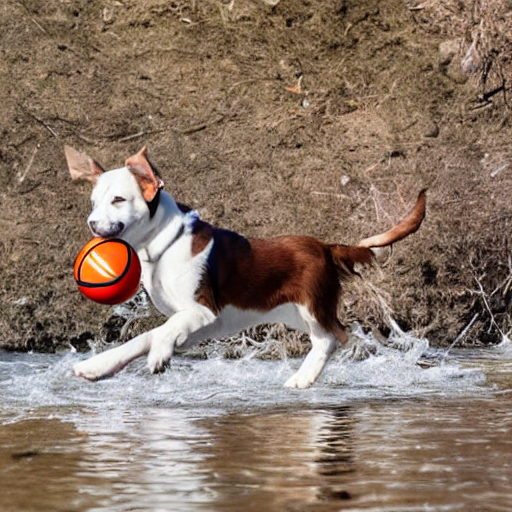

In [11]:
image